<a href="https://colab.research.google.com/github/Sofiyah-Modupeola/DehydrAIte-Dashboard/blob/main/Simulated_Data_For_DehydrAIte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
def generate_drying_data(
    start_time,
    duration_hours,
    sampling_interval_minutes,
    produce_type="Mixed Produce",
    initial_temp_C=60,
    final_humidity_pct=15,
    noise_std_dev_temp=0.5,
    noise_std_dev_humidity=2.0,
    noise_std_dev_pressure=0.5,
    anomaly_start_hour=None,
    anomaly_duration_minutes=None,
    anomaly_type="temp_drop" # "temp_drop", "humidity_spike", "pressure_fluctuation"
):

    """
    Generates simulated sensor data for a drying process.

    Args:
        start_time (datetime): The start datetime of the simulation.
        duration_hours (int): Total duration of the drying process in hours.
        sampling_interval_minutes (int): How often data is sampled in minutes.
        produce_type (str): Type of produce being dried (e.g., "Tomato", "Habanero", "Onion", "Mixed Produce").
        initial_temp_C (float): Target initial drying temperature in Celsius.
        final_humidity_pct (float): Target final humidity percentage.
        noise_std_dev_temp (float): Standard deviation for temperature noise.
        noise_std_dev_humidity (float): Standard deviation for humidity noise.
        noise_std_dev_pressure (float): Standard deviation for pressure noise.
        anomaly_start_hour (int, optional): Hour at which to start an anomaly. Defaults to None.
        anomaly_duration_minutes (int, optional): Duration of the anomaly in minutes. Defaults to None.
        anomaly_type (str): Type of anomaly to simulate.

    Returns:
        pandas.DataFrame: DataFrame containing simulated sensor data.
    """

    total_samples = int((duration_hours * 60) / sampling_interval_minutes)
    time_stamps = [start_time + timedelta(minutes=i * sampling_interval_minutes) for i in range(total_samples)]
    # Initialize lists for data
    temperatures = []
    humidities = []
    pressures = []
    dryness_percentages = []
    anomaly_flags = []

    # Simulate initial conditions
    current_temp = initial_temp_C
    current_humidity = 90.0 # Start with high humidity
    current_pressure = 1013.25 # Standard atmospheric pressure in hPa

    # Calculate humidity decay rate (linear for simplicity)
    humidity_decay_per_interval = (current_humidity - final_humidity_pct) / total_samples

    for i in range(total_samples):
        time_elapsed_hours = i * sampling_interval_minutes / 60.0

        # Base values with noise
        temp_reading = current_temp + np.random.normal(0, noise_std_dev_temp)
        humidity_reading = max(final_humidity_pct, current_humidity - humidity_decay_per_interval * i) + np.random.normal(0, noise_std_dev_humidity)
        pressure_reading = current_pressure + np.random.normal(0, noise_std_dev_pressure)

        # Simulate dryness percentage (inverse of humidity, normalized)
        dryness_pct = 100 - ((humidity_reading - final_humidity_pct) / (90.0 - final_humidity_pct)) * 100
        dryness_pct = np.clip(dryness_pct, 0, 100) # Ensure it stays between 0 and 100

        # Anomaly simulation
        is_anomaly = False
        if anomaly_start_hour is not None and anomaly_duration_minutes is not None:
            anomaly_start_sample = int((anomaly_start_hour * 60) / sampling_interval_minutes)
            anomaly_end_sample = anomaly_start_sample + int(anomaly_duration_minutes / sampling_interval_minutes)

            if anomaly_start_sample <= i < anomaly_end_sample:
                is_anomaly = True
                if anomaly_type == "temp_drop":
                    temp_reading -= np.random.uniform(5, 10) # Significant temp drop
                elif anomaly_type == "humidity_spike":
                    humidity_reading += np.random.uniform(10, 20) # Significant humidity spike
                elif anomaly_type == "pressure_fluctuation":
                    pressure_reading += np.random.normal(0, 5) # Larger pressure swings

        temperatures.append(temp_reading)
        humidities.append(humidity_reading)
        pressures.append(pressure_reading)
        dryness_percentages.append(dryness_pct)
        anomaly_flags.append(1 if is_anomaly else 0)

    data = pd.DataFrame({
        'Timestamp': time_stamps,
        'Produce_Type': produce_type,
        'Temperature_C': temperatures,
        'Humidity_PCT': humidities,
        'Pressure_hPa': pressures,
        'Dryness_PCT': dryness_percentages,
        'Anomaly_Flag': anomaly_flags # 1 if anomaly, 0 otherwise
    })
    return data

# Example 1: Basic drying cycle for tomatoes
print("Generating data for Tomato Slices...")
tomato_data = generate_drying_data(
    start_time=datetime(2025, 7, 12, 8, 0, 0),
    duration_hours=12,
    sampling_interval_minutes=15,
    produce_type="Tomato Slices",
    initial_temp_C=65,
    final_humidity_pct=10
)
tomato_data.to_csv("simulated_tomato_drying_data.csv", index=False)
print("Saved simulated_tomato_drying_data.csv")

# Example 2: Drying cycle for Habanero Peppers with a humidity spike anomaly
print("\nGenerating data for Habanero Peppers with anomaly...")
habanero_data = generate_drying_data(
    start_time=datetime(2025, 7, 12, 9, 0, 0),
    duration_hours=10,
    sampling_interval_minutes=10,
    produce_type="Habanero Peppers",
    initial_temp_C=57,
    final_humidity_pct=8,
    anomaly_start_hour=5, # Anomaly starts 5 hours in
    anomaly_duration_minutes=60, # Lasts for 60 minutes
    anomaly_type="humidity_spike"
)
habanero_data.to_csv("simulated_habanero_drying_data.csv", index=False)
print("Saved simulated_habanero_drying_data.csv")

# Example 3: Drying cycle for Onion Slices with a temperature drop anomaly
print("\nGenerating data for Onion Slices with anomaly...")
onion_data = generate_drying_data(
    start_time=datetime(2025, 7, 12, 10, 0, 0),
    duration_hours=15,
    sampling_interval_minutes=20,
    produce_type="Onion Slices",
    initial_temp_C=60,
    final_humidity_pct=7,
    anomaly_start_hour=8, # Anomaly starts 8 hours in
    anomaly_duration_minutes=90, # Lasts for 90 minutes
    anomaly_type="temp_drop"
)
onion_data.to_csv("simulated_onion_drying_data.csv", index=False)
print("Saved simulated_onion_drying_data.csv")

Generating data for Tomato Slices...
Saved simulated_tomato_drying_data.csv

Generating data for Habanero Peppers with anomaly...
Saved simulated_habanero_drying_data.csv

Generating data for Onion Slices with anomaly...
Saved simulated_onion_drying_data.csv


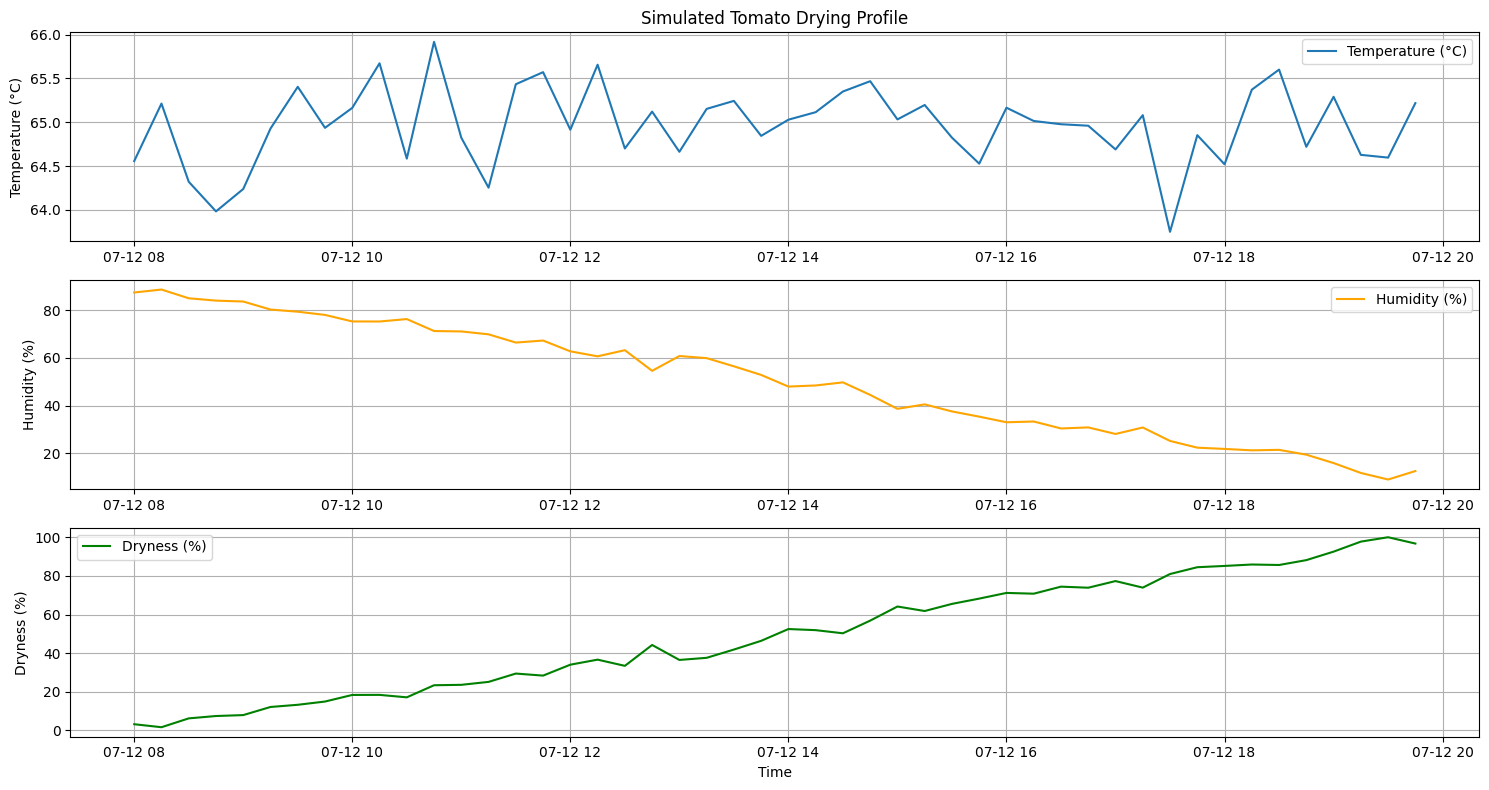

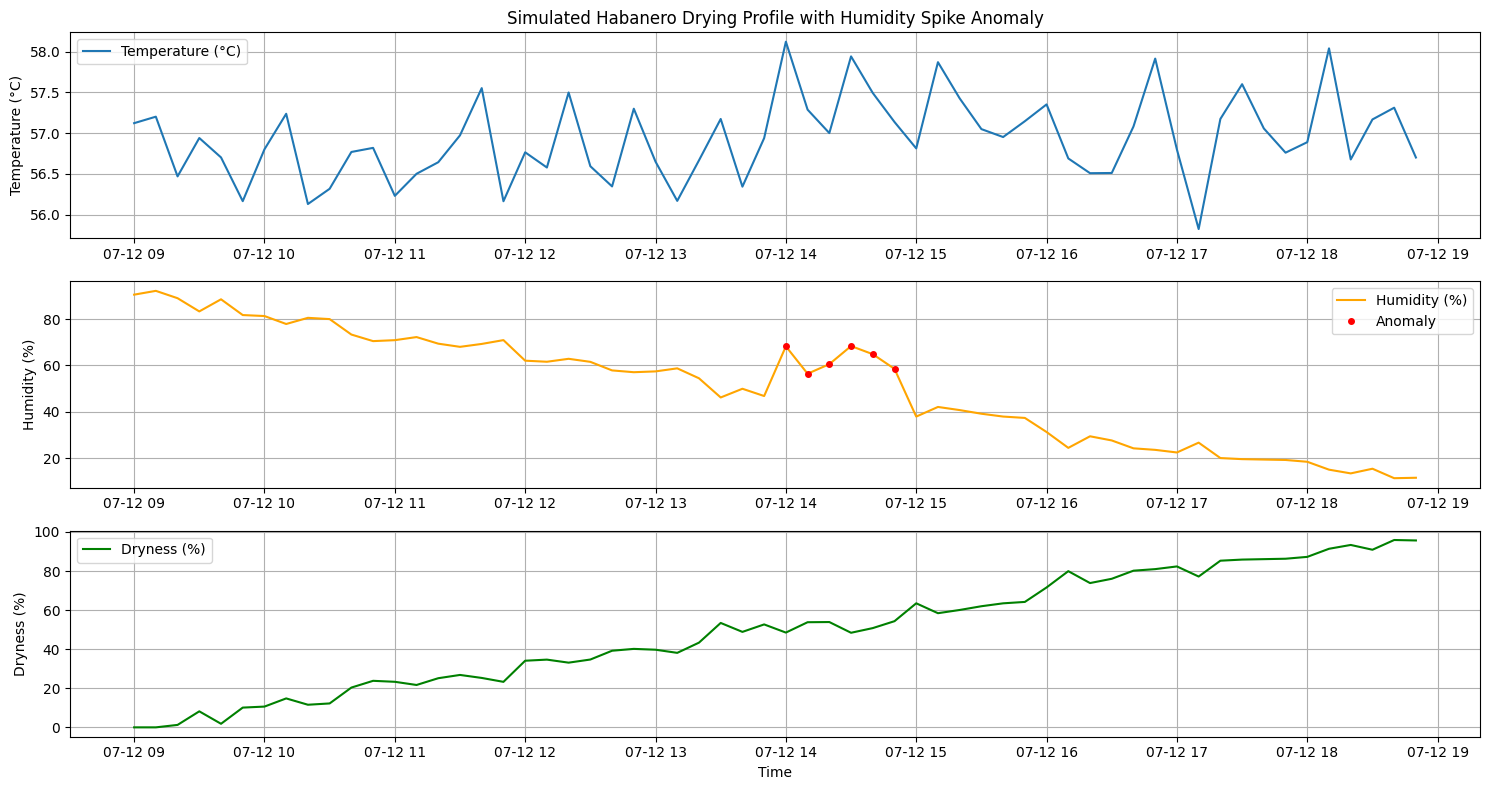

In [ ]:
# --- Optional: Visualize a sample dataset ---
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(tomato_data['Timestamp'], tomato_data['Temperature_C'], label='Temperature (°C)')
plt.title('Simulated Tomato Drying Profile')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tomato_data['Timestamp'], tomato_data['Humidity_PCT'], label='Humidity (%)', color='orange')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tomato_data['Timestamp'], tomato_data['Dryness_PCT'], label='Dryness (%)', color='green')
plt.xlabel('Time')
plt.ylabel('Dryness (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize Habanero data with anomaly
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(habanero_data['Timestamp'], habanero_data['Temperature_C'], label='Temperature (°C)')
plt.title('Simulated Habanero Drying Profile with Humidity Spike Anomaly')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(habanero_data['Timestamp'], habanero_data['Humidity_PCT'], label='Humidity (%)', color='orange')
# Highlight anomaly period
anomaly_period = habanero_data[habanero_data['Anomaly_Flag'] == 1]
plt.plot(anomaly_period['Timestamp'], anomaly_period['Humidity_PCT'], 'ro', markersize=4, label='Anomaly')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(habanero_data['Timestamp'], habanero_data['Dryness_PCT'], label='Dryness (%)', color='green')
plt.xlabel('Time')
plt.ylabel('Dryness (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()